### In this project we will use exploratory data analysis (EDA) to extract features that we can use to Predict stars, so we will follow the below steps:


1-Importing the necessary libraries and loading the Dataset.

2-Data exploration and preprocessing to make sure the data is clean and ready to use it.

3-Check the correlations between the columns.

4-Creating visual methods to analyze the data and Checking the Outliers and the skewness.

5-Try multi ML model and use Grid Search to get the best parameters value for every model to find the best fit model 

6-Comparing between all models accuracy and result to choose the best fit model

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [109]:
# Read the Dataset
df = pd.read_csv('pulsar_stars.csv')



# Data exploration and preprocessing

In [110]:
#Display the first five 
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [111]:
##Check columns names

df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [112]:
#Check for null values
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

no null values in the data set

In [113]:
# a brief summary for the dataset
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [114]:
#checking the data set info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


the data have 9 columns, 8 columns with type float , 1 with type int

In [123]:
#remove spaces from the columns names to avoid any error
new_col_names = ["Mean_of_the_integrated_profile", "Standard_deviation_of_the_integrated_profile", "Excess_kurtosis_of_the_integrated_profile", "Skewness_of_the_integrated_profile", "Mean_of_the_DMSNR_curve", "Standard_deviation_of_the_DMSNR_curve", "Excess_kurtosis_of_the_DMSNR_curve", "Skewness_of_the_DMSNR_curve", "target_class"]
df.columns = new_col_names
df.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DMSNR_curve',
       'Standard_deviation_of_the_DMSNR_curve',
       'Excess_kurtosis_of_the_DMSNR_curve', 'Skewness_of_the_DMSNR_curve',
       'target_class'],
      dtype='object')

# check the correlations 

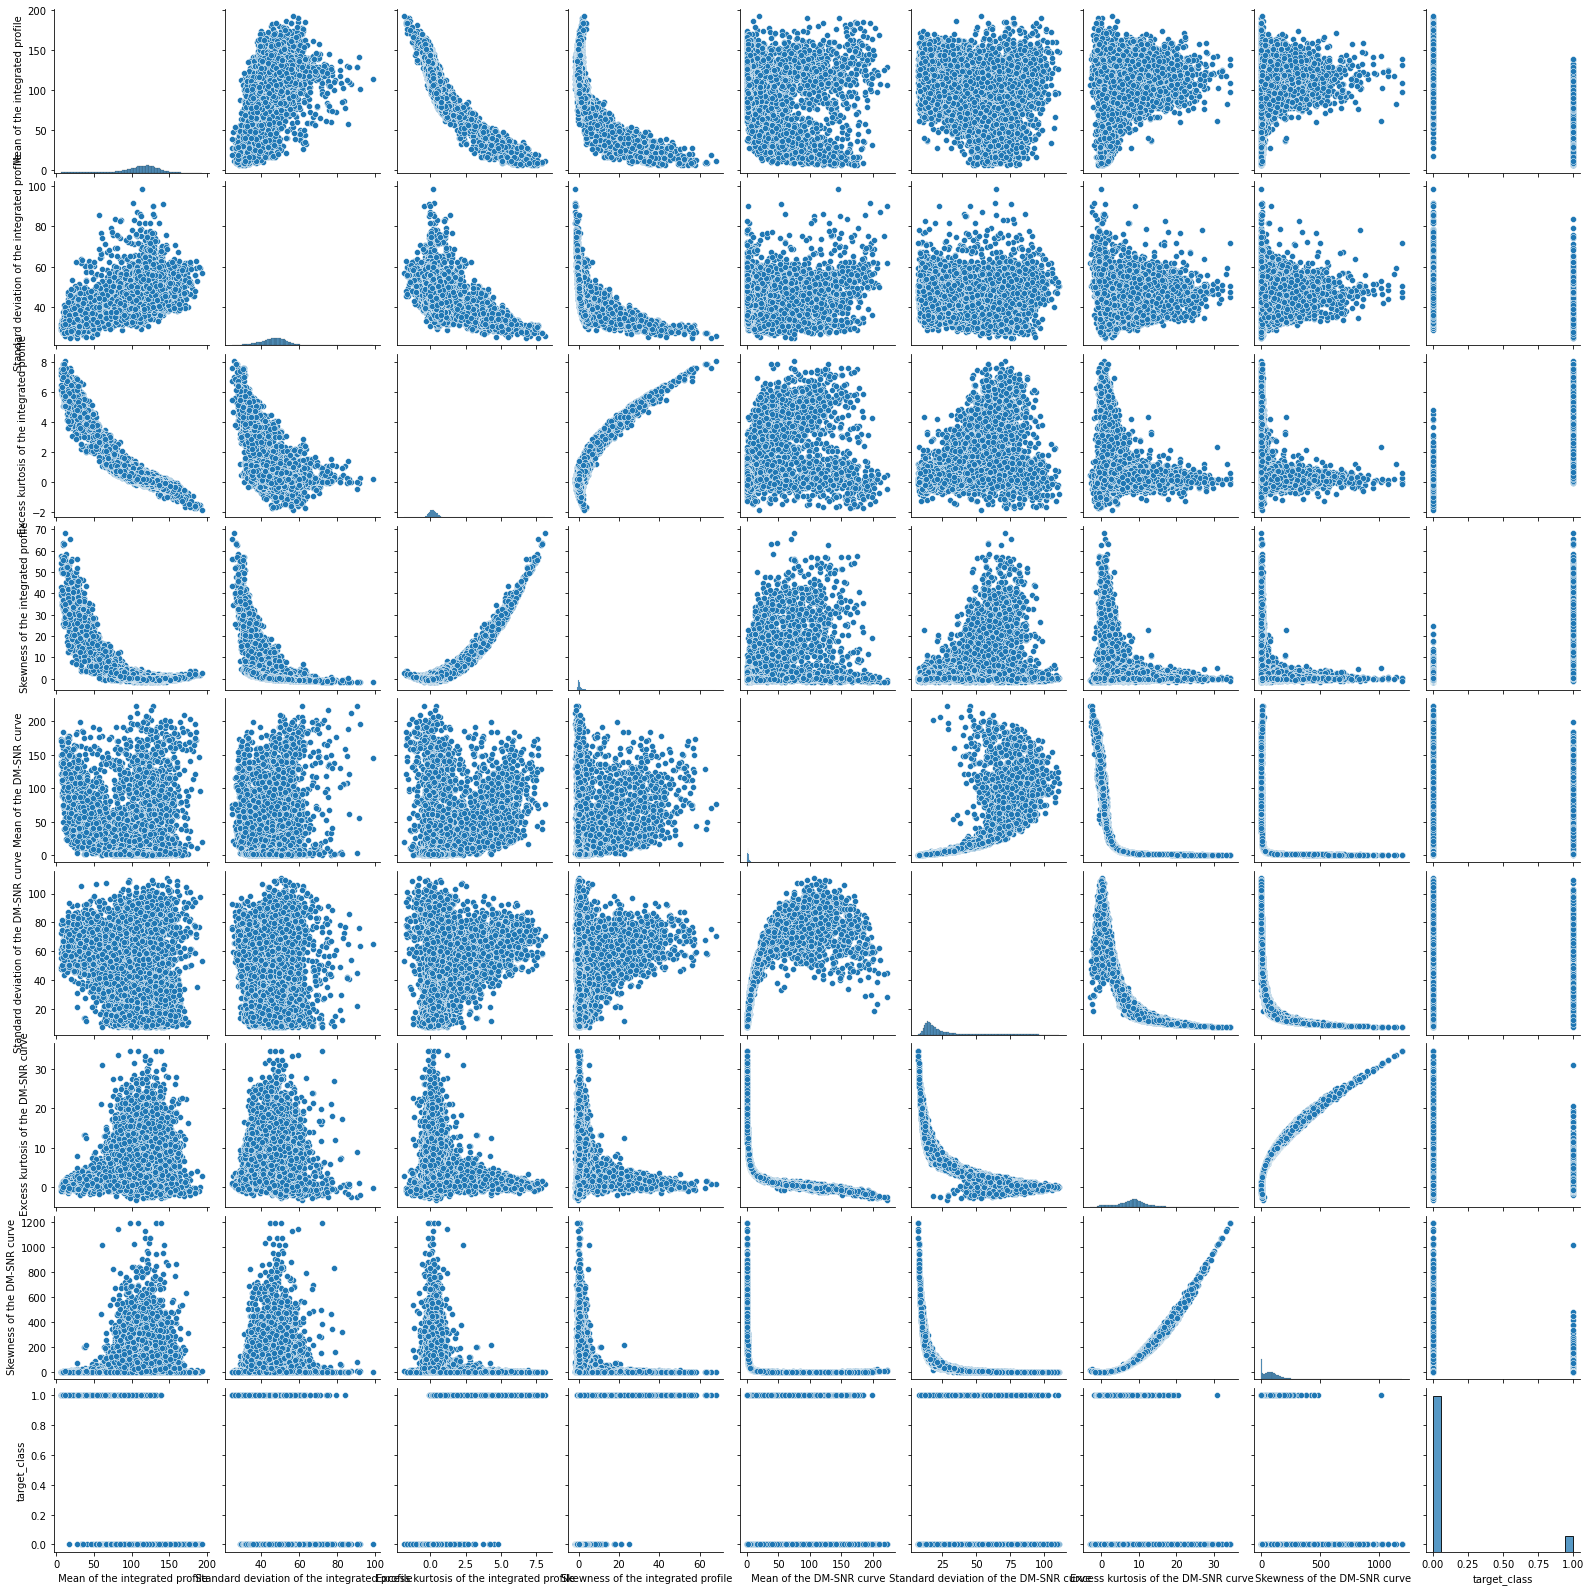

In [115]:
#pairplot to check the correlations
sns.pairplot(df)  
plt.show()

in some of columns the data is spread on the axis

there is exponential curves

In [116]:
#check the correlations between the columns
df.corr()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


<AxesSubplot:>

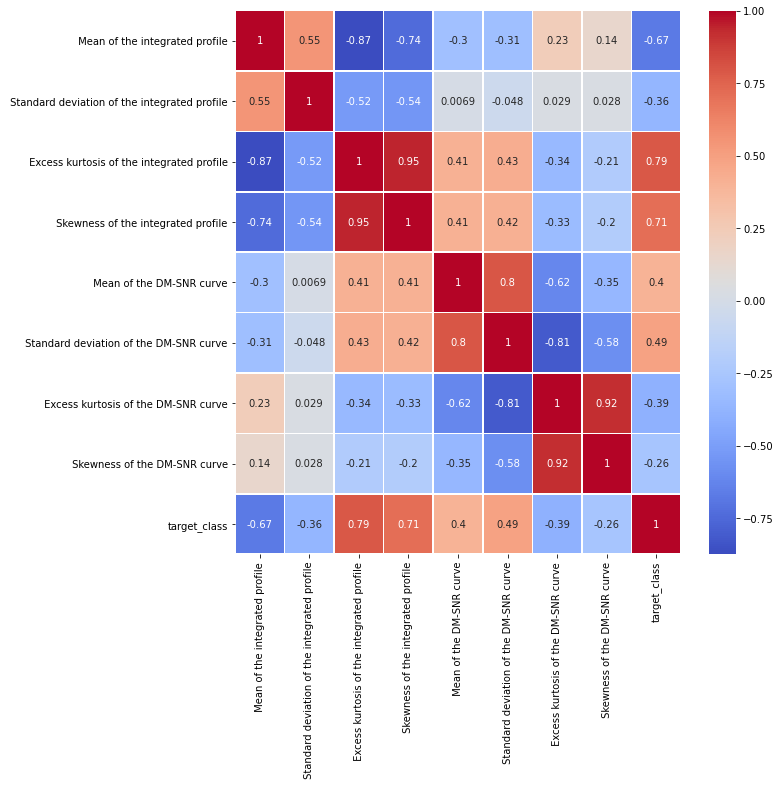

In [117]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)



From the above, we can see , there is a positive corr between (Excess kurtosis of the integrated profile, Skewness of the integrated profile,Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve), and target_class (y),  also there is a negative corr between (Mean of the integrated profile) and target_class (y) , for the other columns there is a weak corr, so we will take all the features 

# Data visualization 

<AxesSubplot:xlabel='target_class', ylabel='count'>

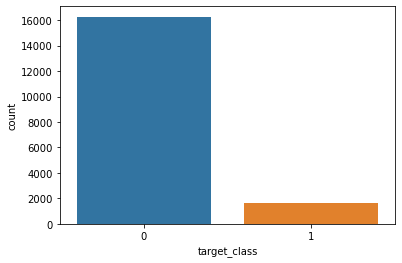

In [121]:
#checking the number of actual stars in the data

sns.countplot(x='target_class',data=df)

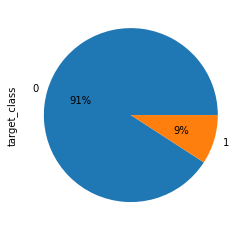

In [122]:
#checking the percentage of actual stars in the data

df["target_class"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

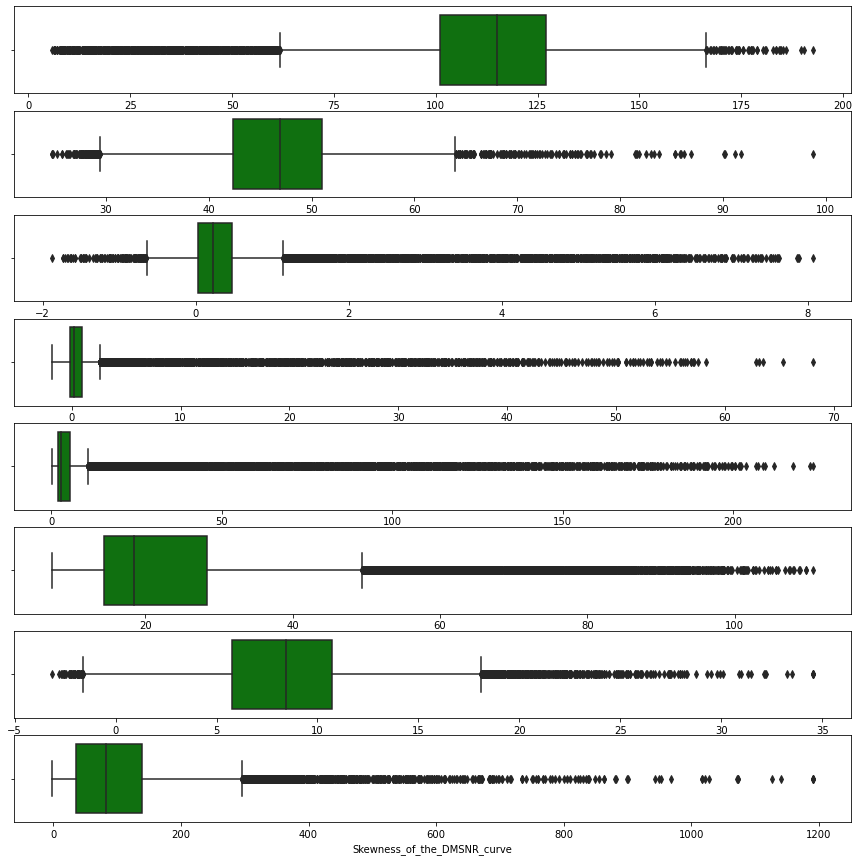

In [53]:
# Checking for the outliers
plt.figure(figsize= (15,15))
plt.subplot(8,1,1)
sns.boxplot(x=  df['Mean_of_the_integrated_profile'], color='green')

plt.subplot(8,1,2)
sns.boxplot(x=  df['Standard_deviation_of_the_integrated_profile'], color='green')

plt.subplot(8,1,3)
sns.boxplot(x=  df['Excess_kurtosis_of_the_integrated_profile'], color='green')


plt.subplot(8,1,4)
sns.boxplot(x=  df['Skewness_of_the_integrated_profile'], color='green')
plt.subplot(8,1,5)
sns.boxplot(x=  df['Mean_of_the_DMSNR_curve'], color='green')
plt.subplot(8,1,6)

sns.boxplot(x=  df['Standard_deviation_of_the_DMSNR_curve'], color='green')
plt.subplot(8,1,7)

sns.boxplot(x= df['Excess_kurtosis_of_the_DMSNR_curve'], color='green')
plt.subplot(8,1,8)
sns.boxplot(x= df['Skewness_of_the_DMSNR_curve'], color='green')



plt.show()

as we can see here the data have outliers

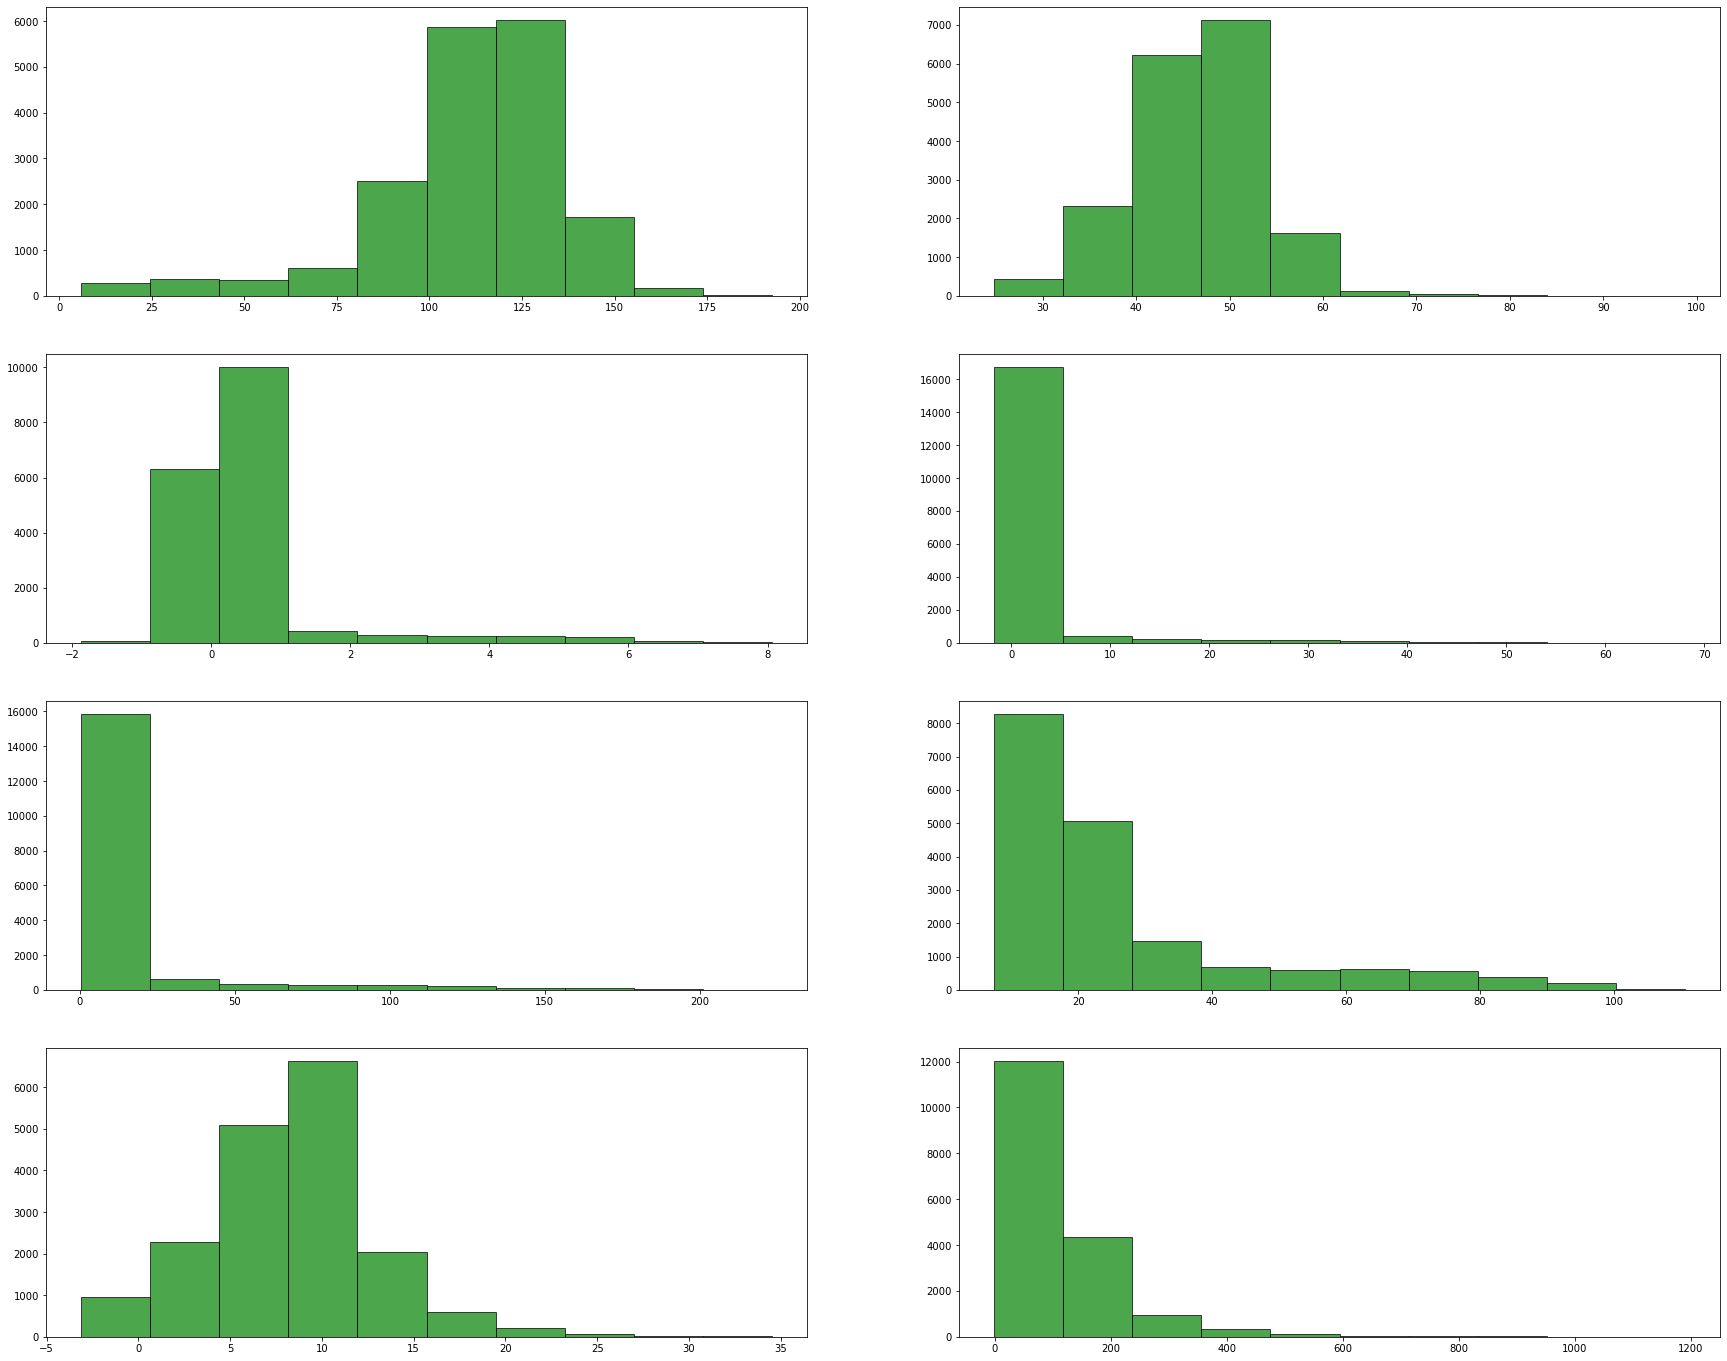

In [38]:
#check the distribution of the data 

plt.figure(figsize= (30,50))
plt.subplot(8,2,1)
plt.hist(x= df['Mean_of_the_integrated_profile'], color='green', edgecolor = 'black', alpha = 0.7)

plt.subplot(8,2,2)
plt.hist(x=  df['Standard_deviation_of_the_integrated_profile'], color='green', edgecolor = 'black', alpha = 0.7)

plt.subplot(8,2,3)
plt.hist(x=  df['Excess_kurtosis_of_the_integrated_profile'], color='green', edgecolor = 'black', alpha = 0.7)


plt.subplot(8,2,4)
plt.hist(x=  df['Skewness_of_the_integrated_profile'], color='green', edgecolor = 'black', alpha = 0.7)
plt.subplot(8,2,5)
plt.hist(x=  df['Mean_of_the_DMSNR_curve'], color='green', edgecolor = 'black', alpha = 0.7)
plt.subplot(8,2,6)

plt.hist(x=  df['Standard_deviation_of_the_DMSNR_curve'], color='green', edgecolor = 'black', alpha = 0.7)
plt.subplot(8,2,7)

plt.hist(x= df['Excess_kurtosis_of_the_DMSNR_curve'], color='green', edgecolor = 'black', alpha = 0.7)
plt.subplot(8,2,8)
plt.hist(x= df['Skewness_of_the_DMSNR_curve'], color='green', edgecolor = 'black', alpha = 0.7)



plt.show()

The data is not uniformly distributed 

C:\Users\Omar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

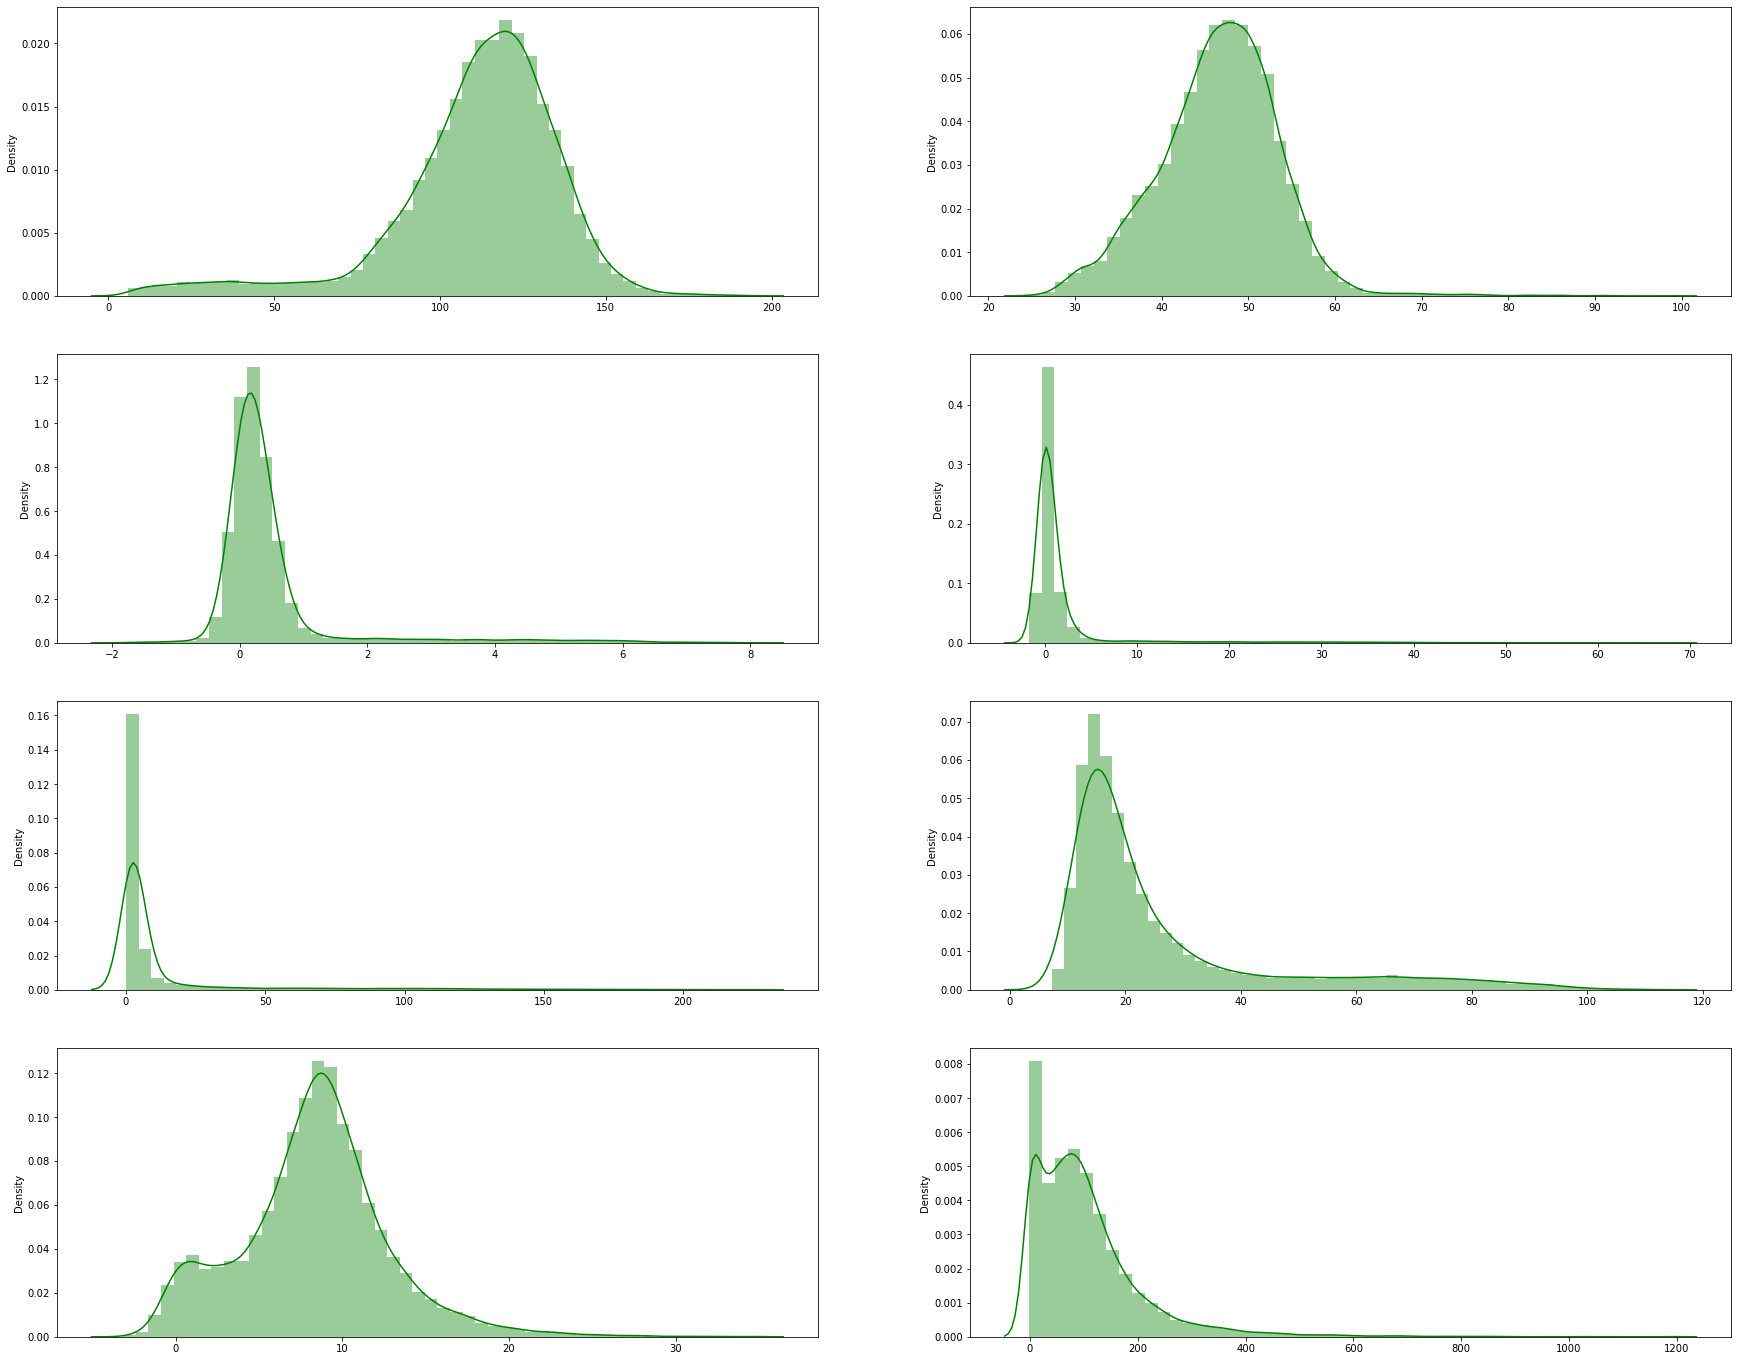

In [51]:
# Checking for the skewness
plt.figure(figsize= (30,50))
plt.subplot(8,2,1)
sns.distplot(x= df['Mean_of_the_integrated_profile'], color='green')

plt.subplot(8,2,2)
sns.distplot(x=  df['Standard_deviation_of_the_integrated_profile'], color='green')

plt.subplot(8,2,3)
sns.distplot(x=  df['Excess_kurtosis_of_the_integrated_profile'], color='green')


plt.subplot(8,2,4)
sns.distplot(x=  df['Skewness_of_the_integrated_profile'], color='green')
plt.subplot(8,2,5)
sns.distplot(x=  df['Mean_of_the_DMSNR_curve'], color='green')
plt.subplot(8,2,6)

sns.distplot(x=  df['Standard_deviation_of_the_DMSNR_curve'], color='green')
plt.subplot(8,2,7)

sns.distplot(x= df['Excess_kurtosis_of_the_DMSNR_curve'], color='green')
plt.subplot(8,2,8)
sns.distplot(x= df['Skewness_of_the_DMSNR_curve'], color='green')



plt.show()

there is a skewness in the most of the columns but we will handle it using normalization

# ML Models


In [63]:
#grouping the features into feature vector ( X )

X = df.drop(['target_class'],axis=1)


In [64]:
#chossing the predict column (Y)
y = df['target_class']


In [65]:
#normalization of the data 
X=(X-np.min(X))/(np.max(X)-np.min(X)).values

In [66]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0,shuffle=True)


# LogisticRegression

In [67]:
#Using grid search
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978918 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.978899 (0.003403) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.978899 (0.003403) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.978918 (0.003416) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.976962 (0.003360) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.976962 (0.003360) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.976869 (0.003439) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.974150 (0.003404) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.974150 (0.003404) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.974020 (0.003379) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.966812 (0.003502) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966812 (0.003502) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.966924 (0.003450) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.943346 (0.003227) wit

In [71]:
classifier = LogisticRegression(C=100,penalty = 'l2' ,solver='liblinear')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4095,   20],
       [  64,  296]], dtype=int64)

In [72]:
Log_acc=accuracy_score(y_test, y_pred)
Log_acc

0.9812290502793296

In [73]:
log_cr=classification_report(y_test, y_pred)
print(log_cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4115
           1       0.94      0.82      0.88       360

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



# RandomFores

In [74]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980110 using {'max_features': 'log2', 'n_estimators': 100}
0.979309 (0.003667) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.979868 (0.003516) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.979905 (0.003469) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.978936 (0.004019) with: {'max_features': 'log2', 'n_estimators': 10}
0.980110 (0.003552) with: {'max_features': 'log2', 'n_estimators': 100}
0.979942 (0.003507) with: {'max_features': 'log2', 'n_estimators': 1000}


In [75]:
classifier = RandomForestClassifier(n_estimators = 100, max_features = 'log2')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4095,   20],
       [  58,  302]], dtype=int64)

In [76]:
Rand_acc=accuracy_score(y_test, y_pred)
Rand_acc

0.9825698324022346

In [77]:
rf_cr=classification_report(y_test, y_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4115
           1       0.94      0.84      0.89       360

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



# Decision Tree


In [78]:
model = DecisionTreeClassifier()
splitter = ['best', 'random']
criterion = ['gini', 'entropy'],
max_features= ['log2', 'sqrt','auto']
max_depth = [2, 3, 5, 10, 17]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1,5,8,11]
random_state = [0,1,2,3,4,5]
# define grid search
grid = dict(splitter=splitter ,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf = min_samples_leaf,random_state = random_state )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978713 using {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 5, 'splitter': 'random'}
0.977633 (0.003450) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
0.935002 (0.003749) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'random'}
0.977633 (0.003450) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'best'}
0.968414 (0.004708) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'random'}
0.977633 (0.003450) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}
0.957314 (0.005069) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'random'}
0.977633 (0.003450) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'ra

In [85]:
classifier = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 8, min_samples_split= 2, random_state = 5, splitter = 'random')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4084,   31],
       [  56,  304]], dtype=int64)

In [86]:
Dt_acc=accuracy_score(y_test, y_pred)
Dt_acc

0.9805586592178771

In [87]:
dt_cr=classification_report(y_test, y_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4115
           1       0.91      0.84      0.87       360

    accuracy                           0.98      4475
   macro avg       0.95      0.92      0.93      4475
weighted avg       0.98      0.98      0.98      4475



# KNN


In [89]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979216 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.970872 (0.003935) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.970872 (0.003935) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.977242 (0.003544) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.977223 (0.003535) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.977949 (0.003915) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.978322 (0.003607) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.978564 (0.003858) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.978731 (0.003694) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.978229 (0.004181) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.978378 (0.004083) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.978303 

In [90]:
classifier = KNeighborsClassifier(n_neighbors=7 , metric= 'manhattan',weights = 'distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4094,   21],
       [  57,  303]], dtype=int64)

In [91]:
KNN_acc=accuracy_score(y_test, y_pred)
KNN_acc

0.9825698324022346

In [92]:
knn_cr=classification_report(y_test, y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4115
           1       0.94      0.84      0.89       360

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



# Support Vector 


In [94]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979998 using {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.979830 (0.003081) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.979681 (0.003223) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.901236 (0.004815) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.979998 (0.003138) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.979514 (0.003124) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.901460 (0.004682) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.979793 (0.003186) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.978303 (0.003585) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.904346 (0.004911) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.978322 (0.003135) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.975416 (0.003659) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.924181 (0.004718) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.972641 (0.003233) with: {'C': 0.01, 'gamma': 'scale',

In [96]:
classifier =SVC(C = 10, gamma = 'scale',kernel= 'poly') 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)   
cm = confusion_matrix(y_test, y_pred)
cm

array([[4096,   19],
       [  53,  307]], dtype=int64)

In [97]:
SVC_acc=accuracy_score(y_test, y_pred)
SVC_acc

0.9839106145251396

In [98]:
SVC_cr=classification_report(y_test, y_pred)
print(SVC_cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4115
           1       0.94      0.85      0.90       360

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



# Comparing between all models accuracy to choose the best fit model

In [125]:
print('the Accurecy of the models :')

print('Logistic regression = ' , Log_acc)
print('Random Forest = ', Rand_acc)
print('Decision Tree = ' , Dt_acc)
print('KNN = ' , KNN_acc)
print ('SVM = ', SVC_acc)


the Accurecy of the models :
Logistic regression =  0.9812290502793296
Random Forest =  0.9825698324022346
Decision Tree =  0.9805586592178771
KNN =  0.9825698324022346
SVM =  0.9839106145251396


# Support Vector machine give us the best result with the highest accuracy